In [1]:
%matplotlib inline 
#直接输出到单元格
import torch
import torchvision
from torch import nn
from d2l import torch as d2l


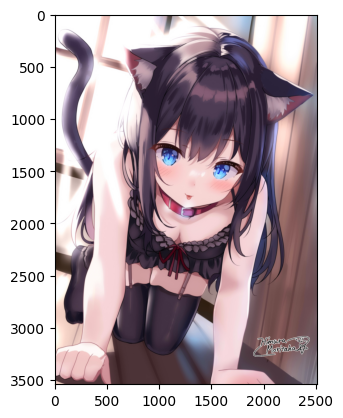

In [ ]:
# d2l.set_figsize()    # show输出调整到合适的尺寸
img = d2l.Image.open('C:/Users/Ardbert Conner/.conda/envs/d2l/Lib/img/cat1.jpg')
d2l.plt.imshow(img)

# 各种变换

In [12]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    d2l.show_images(Y, num_rows, num_cols, scale=scale)

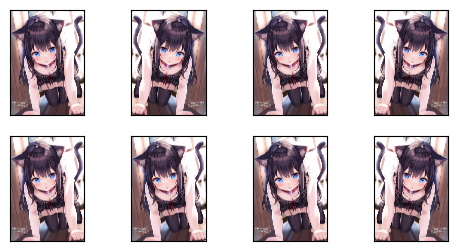

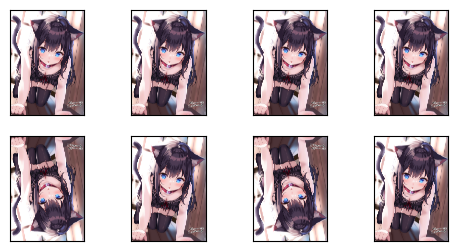

In [14]:
apply(img, torchvision.transforms.RandomHorizontalFlip())  #水平翻转
apply(img, torchvision.transforms.RandomVerticalFlip(p=0.2))

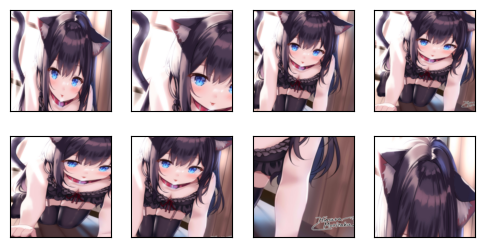

In [17]:
crop_aug = torchvision.transforms.RandomResizedCrop(
    size=(200, 200), scale=(0.1, 1), ratio=(0.5, 2))  # 裁剪、拉伸
apply(img, crop_aug)

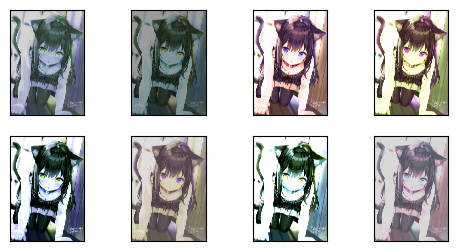

In [19]:

color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)  # 亮度 对比度 饱和度 色调 # 参数单数字代表范围 
apply(img, color_aug)

# 组合变换

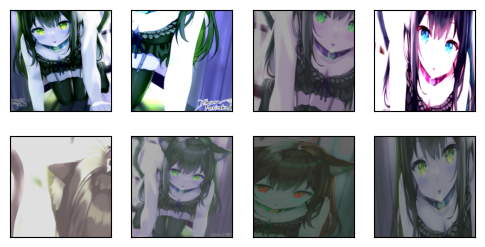

In [20]:
augs = torchvision.transforms.Compose(
    [torchvision.transforms.RandomHorizontalFlip(), crop_aug, color_aug]
)
apply(img, augs)

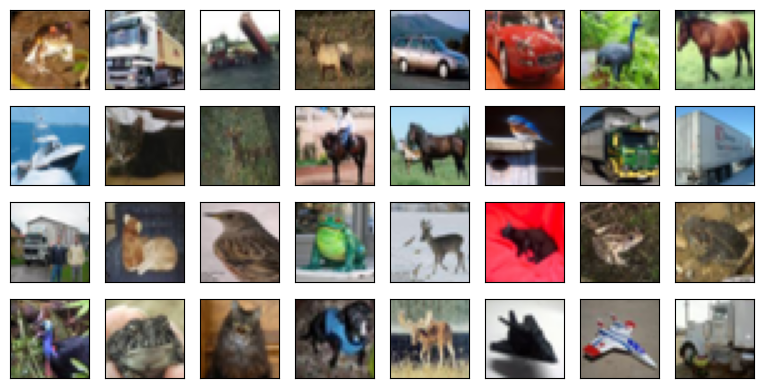

In [27]:
all_images = torchvision.datasets.CIFAR10(root='../data', train=True, download=True)
d2l.show_images([all_images[i][0] for i in range(32)], num_rows=4, num_cols=8, scale=1.2); # 分号抑制输出

In [ ]:
type(all_images), type(all_images[0]), all_images[0][0], all_images[0][1]  # datasets，存储图片类型二元组

(torchvision.datasets.cifar.CIFAR10,
 tuple,
 <PIL.Image.Image image mode=RGB size=32x32>,
 6)

In [38]:
torchvision.datasets.CIFAR10(root='../data', train=True, transform=torchvision.transforms.RandomHorizontalFlip(), download=True).__len__


<bound method CIFAR10.__len__ of Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: RandomHorizontalFlip(p=0.5)>